<b> Dual Lattice Attack section </b>

In [1]:
# Maintainer : Kévin Carrier
import csv
tex_format = "amsart" # either amsart or llncs
DP23 = "[19, §5, Fig. 3]" if tex_format == "llncs" else "[DP23, §5, Fig. 3]"

# Reading the data of DP23

L_DP23_n40 = []
with open('data_DP23/unif_scores_n40.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csv_reader:
        if row[0] != 'score' and row[0] != '':
            L_DP23_n40.append([float(row[0]), float(row[1]), float(row[2])])
        
plt_DP23_n40 = list_plot([[val[0], val[2]] for val in L_DP23_n40], plotjoined=True, color='teal', legend_label="experiments in "+DP23)

L_DP23_n50 = []
with open('data_DP23/unif_scores_n50.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csv_reader:
        if row[0] != 'score' and row[0] != '':
            L_DP23_n50.append([float(row[0]), float(row[1]), float(row[2])])
        
plt_DP23_n50 = list_plot([[val[0], val[2]] for val in L_DP23_n50], plotjoined=True, color='teal', legend_label="experiments in "+DP23)

L_DP23_n60 = []
with open('data_DP23/unif_scores_n60.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csv_reader:
        if row[0] != 'score' and row[0] != '':
            L_DP23_n60.append([float(row[0]), float(row[1]), float(row[2])])
        
plt_DP23_n60 = list_plot([[val[0], val[2]] for val in L_DP23_n60], plotjoined=True, color='teal', legend_label="experiments in "+DP23)


L_DP23_n70 = []
with open('data_DP23/unif_scores_n70.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csv_reader:
        if row[0] != 'score' and row[0] != '':
            L_DP23_n70.append([float(row[0]), float(row[1]), float(row[2])])
        
plt_DP23_n70 = list_plot([[val[0], val[2]] for val in L_DP23_n70], plotjoined=True, color='teal', legend_label="experiments in "+DP23)

L_DP23_n80 = []
with open('data_DP23/unif_scores_n80.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csv_reader:
        if row[0] != 'score' and row[0] != '':
            L_DP23_n80.append([float(row[0]), float(row[1]), float(row[2])])
        
plt_DP23_n80 = list_plot([[val[0], val[2]] for val in L_DP23_n80], plotjoined=True, color='teal', legend_label="experiments in "+DP23)


L_DP23_n90 = []
with open('data_DP23/unif_scores_n90.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csv_reader:
        if row[0] != 'score' and row[0] != '':
            L_DP23_n90.append([float(row[0]), float(row[1]), float(row[2])])
        
plt_DP23_n90 = list_plot([[val[0], val[2]] for val in L_DP23_n90], plotjoined=True, color='teal', legend_label="experiments in "+DP23)

In [2]:
from sage.modules.misc import gram_schmidt

#Gaussian Heuristique
def GH(n):
    return float( sqrt((n/(2*pi*e)) * (pi*n)^(1/n)) )

q = 3329
n = 40
N = 284
kfft = 16
enum = 29


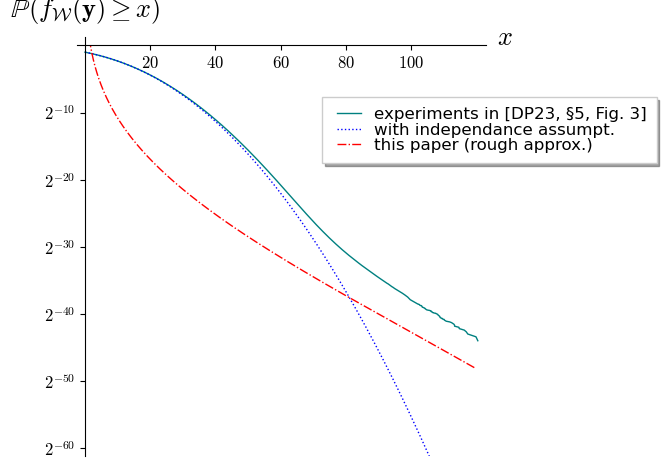

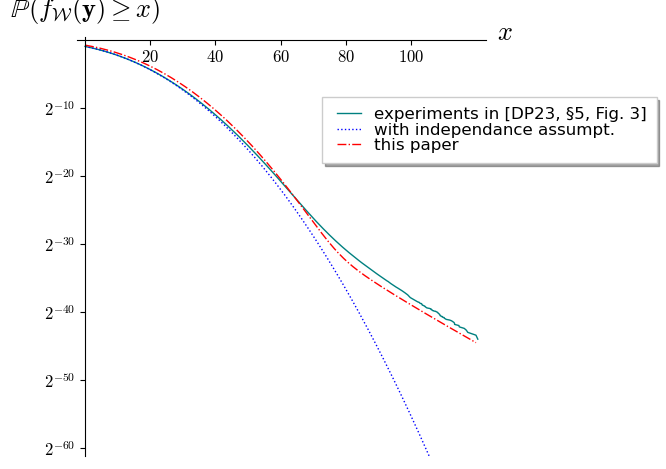

In [3]:
fd = open('out_n40_fft16_enum29.txt', 'r')
lines = fd.readlines()

tag = 0
N,n,q,kfft,enum = 0,0,0,0,0

Bprime_list = []
UinvT_list = []
dual_vectors = []
dual_vectors_rebased = []

for line in lines:
    if line[:3] == "-->":
        if tag == 1:
            line = line[:-1].replace("  ", " ")
            while "  " in line:
                line = line.replace("  ", " ")
            splitted_line = line.split(" ")
            n = int(splitted_line[3][2:])
            N = int(splitted_line[4][2:])
            q = int(splitted_line[5][2:])
            kfft = int(splitted_line[6][4:])
            enum = int(splitted_line[7][5:])

            print("q =",q)
            print("n =",n)
            print("N =",N)
            print("kfft =",kfft)
            print("enum =",enum)
        tag += 1
    elif(tag == 1):
        splitted_line = line[1:-2].split(", ")
        v = [float(x) for x in splitted_line]
        Bprime_list.append(v)
    elif(tag == 2):
        splitted_line = line[1:-2].split(", ")
        v = [float(x) for x in splitted_line]
        dual_vectors.append(v)

Bprime = matrix(Bprime_list)
Bprime_inv = Bprime.inverse()

vol_primal = abs(Bprime.determinant())
vol_dual = abs(Bprime_inv.determinant())
dgv = float(GH(n)*(vol_primal^(1/n)))


lengths_dual_vectors = [sqrt(sum([x*x for x in vector(v)*Bprime_inv.transpose()])) for v in dual_vectors]
w = float(sum(lengths_dual_vectors)/len(lengths_dual_vectors))


def Nj_f(x):
    card_Lambda = q^(n/2) * 2^(kfft)
    return float((1/card_Lambda) * (x/GH(n))^n)


L = []
L_pt = []

j = dgv - 70
while Nj_f(j) < 1.0 :
    j += 0.1
    bessel = bessel_J(n/2 - 1, 2*pi*w*j)
    L_pt.append([j, bessel])
    cst = float(N*sqrt(pi * n)/e)
    Nj = Nj_f(j)
    T = float((n/(2*pi*e*w*j))^(n/2 - 1))
    x = float(cst*T*bessel)
    y = float(log(Nj, 2))
    L.append([x,y])
    #print([x,y])

#(plot(lambda x: bessel_J(n/2 - 1, 2*pi*w*x), 0, dgv, color='green') + list_plot(L_pt, color='red')).show()

# Survival function of Xfall in the waterfall zone (survival function with the independance assumption)
def sf_Xfall(x):
    return float(log(0.5*erfc(x/sqrt(N)), 2))

plt_rough = plt_DP23_n40 + plot(sf_Xfall, 0,  120, ymin=-60, linestyle=':', color='blue', legend_label='with independance assumpt.')
plt_rough += list_plot(L, plotjoined=True,  linestyle='-.', color='red', axes_labels=['$x$', '$\\mathbb{P}\\left(f_{\\mathcal{W}}(\\mathbf{y}) \\geq x \\right)$'], legend_label='this paper (rough approx.)', ticks=[[20,40,60,80,100], [-10,-20,-30,-40,-50,-60]], tick_formatter=[["$20$","$40$","$60$","$80$","$100$"], ["$2^{-10}$","$2^{-20}$","$2^{-30}$","$2^{-40}$","$2^{-50}$","$2^{-60}$"]], fontsize=12)

plt_rough.set_legend_options(handlelength=2, loc=(0.6,0.7), font_size=12)
plt_rough.save("figures/dual_attack_n40_rough_"+tex_format+".pdf")
plt_rough.show()


# A more precise prediction
RR = RealField(512)

# The evaluation function
def f_W(j):
    return float( N * (sqrt(n*pi)/e) * (n/(2*pi*e*w*j))^(n/2-1) * bessel_J(n/2 - 1, 2*pi*w*j) )

# Cumulative distribution function of j_1
def cdf_len_shortest(j):
    vol_B1 = pi^(n/2) / gamma(n/2 + 1)
    theta = vol_primal / vol_B1
    return RR(1 - exp(- (j^n)/theta))

# Survival function of Xfloor := f_W(j_1)
sf_Xfloor_sampled = []
j=1
x = f_W(j)
y = cdf_len_shortest(j)
while y < 1 - 10^(-100): 
    sf_Xfloor_sampled = [[x,float(log(y))]] + sf_Xfloor_sampled
    j += 1
    x = f_W(j)
    y = cdf_len_shortest(j)

x_floor_min = sf_Xfloor_sampled[0][0]
x_floor_max = sf_Xfloor_sampled[-1][0]

# interpolate sf_floor_sampled
sf_Xfloor = spline(sf_Xfloor_sampled)
    
    
# Probability density function of Xfall (waterfall zone)
def pdf_Xfall(x):
    return float( -(x^2)/N  - 0.5*log(pi * N) )


# Survival function of X (convolutional product of sf_Xfloor and pdf_Xfall)
def sf_X(x):
    # note that sf_Xfloor(x) = 1 for x < x_floor_min and sf_Xfloor(x) = 0 for x > x_floor_max
    tmp1 = numerical_integral( lambda t : exp(RR(pdf_Xfall(x-t))), -Infinity, x_floor_min)[0]
    tmp2 = numerical_integral( lambda t : exp(RR(sf_Xfloor(t) + pdf_Xfall(x-t))), x_floor_min, x_floor_max)[0]
    return tmp1+tmp2


plt_precise = plt_DP23_n40 + plot(sf_Xfall, 0, 120, ymin=-60, linestyle=':', color='blue', legend_label='with independance assumpt.')
plt_precise += plot(lambda x : log(sf_X(x), 2), 0, 120, linestyle='-.', color='red', axes_labels=['$x$', '$\\mathbb{P}\\left(f_{\\mathcal{W}}(\\mathbf{y}) \\geq x \\right)$'], legend_label='this paper', ticks=[[20,40,60,80,100], [-10,-20,-30,-40,-50,-60]], tick_formatter=[["$20$","$40$","$60$","$80$","$100$"], ["$2^{-10}$","$2^{-20}$","$2^{-30}$","$2^{-40}$","$2^{-50}$","$2^{-60}$"]], fontsize=12)

plt_precise.set_legend_options(handlelength=2, loc=(0.6,0.7), font_size=12)
plt_precise.save("figures/dual_attack_n40_precise_"+tex_format+".pdf")
plt_precise.show()


q = 3329
n = 50
N = 1196
kfft = 17
enum = 28


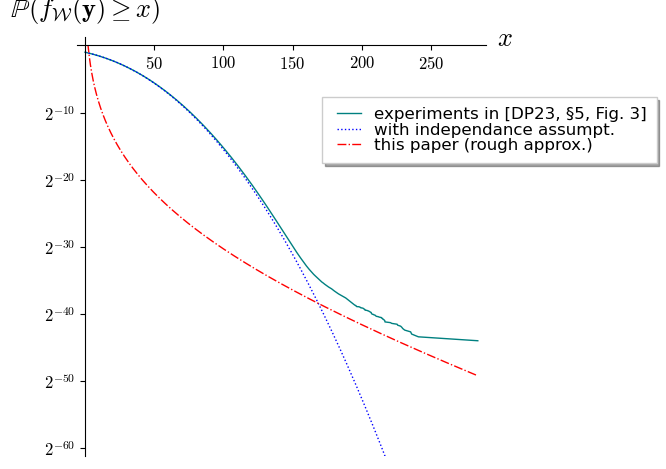

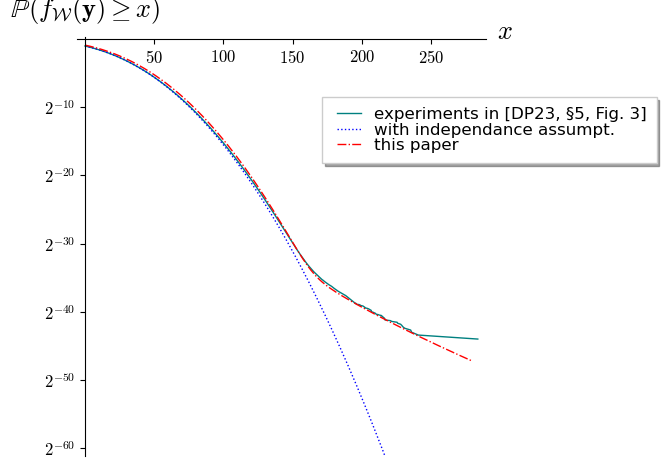

In [4]:
fd = open('out_n50_fft17_enum28.txt', 'r')
lines = fd.readlines()

tag = 0
N,n,q,kfft,enum = 0,0,0,0,0

Bprime_list = []
UinvT_list = []
dual_vectors = []
dual_vectors_rebased = []

for line in lines:
    if line[:3] == "-->":
        if tag == 1:
            line = line[:-1].replace("  ", " ")
            while "  " in line:
                line = line.replace("  ", " ")
            splitted_line = line.split(" ")
            n = int(splitted_line[3][2:])
            N = int(splitted_line[4][2:])
            q = int(splitted_line[5][2:])
            kfft = int(splitted_line[6][4:])
            enum = int(splitted_line[7][5:])

            print("q =",q)
            print("n =",n)
            print("N =",N)
            print("kfft =",kfft)
            print("enum =",enum)
        tag += 1
    elif(tag == 1):
        splitted_line = line[1:-2].split(", ")
        v = [float(x) for x in splitted_line]
        Bprime_list.append(v)
    elif(tag == 2):
        splitted_line = line[1:-2].split(", ")
        v = [float(x) for x in splitted_line]
        dual_vectors.append(v)

Bprime = matrix(Bprime_list)
Bprime_inv = Bprime.inverse()

vol_primal = abs(Bprime.determinant())
vol_dual = abs(Bprime_inv.determinant())
dgv = float(GH(n)*(vol_primal^(1/n)))


lengths_dual_vectors = [sqrt(sum([x*x for x in vector(v)*Bprime_inv.transpose()])) for v in dual_vectors]
w = float(sum(lengths_dual_vectors)/len(lengths_dual_vectors))

def Nj_f(x):
    card_Lambda = q^(n/2) * 2^(kfft)
    return float((1/card_Lambda) * (x/GH(n))^n)

#plot(Nj_f, 0, dgv).show()

L = []
L_pt = []

j = dgv - 65
while Nj_f(j) < 1.0 :
    j += 0.1
    bessel = bessel_J(n/2 - 1, 2*pi*w*j)
    L_pt.append([j, bessel])
    cst = float(N*sqrt(pi * n)/e)
    Nj = Nj_f(j)
    T = float((n/(2*pi*e*w*j))^(n/2 - 1))
    x = float(cst*T*bessel)
    y = float(log(Nj, 2))
    L.append([x,y])
    #print([x,y])

#(plot(lambda x: bessel_J(n/2 - 1, 2*pi*w*x), 0, dgv, color='green') + list_plot(L_pt, color='red')).show()

# Survival function of Xfall in the waterfall zone (survival function with the independance assumption)
def sf_Xfall(x):
    return float(log(0.5*erfc(x/sqrt(N)), 2))

plt_rough = plt_DP23_n50 + plot(sf_Xfall, 0, 280, ymin=-60, linestyle=':', color='blue', legend_label='with independance assumpt.')
plt_rough += list_plot(L, plotjoined=True,  linestyle='-.', color='red', axes_labels=['$x$', '$\\mathbb{P}\\left(f_{\\mathcal{W}}(\\mathbf{y}) \\geq x \\right)$'], legend_label='this paper (rough approx.)', ticks=[[50,100,150,200,250], [-10,-20,-30,-40,-50,-60]], tick_formatter=[["$50$","$100$","$150$","$200$","$250$"], ["$2^{-10}$","$2^{-20}$","$2^{-30}$","$2^{-40}$","$2^{-50}$","$2^{-60}$"]], fontsize=12)

plt_rough.set_legend_options(handlelength=2, loc=(0.6,0.7), font_size=12)
plt_rough.save("figures/dual_attack_n50_rough_"+tex_format+".pdf")
plt_rough.show()


# A more precise prediction
RR = RealField(512)

# The evaluation function
def f_W(j):
    return float( N * (sqrt(n*pi)/e) * (n/(2*pi*e*w*j))^(n/2-1) * bessel_J(n/2 - 1, 2*pi*w*j) )

# Cumulative distribution function of j_1
def cdf_len_shortest(j):
    vol_B1 = pi^(n/2) / gamma(n/2 + 1)
    theta = vol_primal / vol_B1
    return RR(1 - exp(- (j^n)/theta))

# Survival function of Xfloor := f_W(j_1)
sf_Xfloor_sampled = []
j=1
x = f_W(j)
y = cdf_len_shortest(j)
while y < 1 - 10^(-100): 
    sf_Xfloor_sampled = [[x,float(log(y))]] + sf_Xfloor_sampled
    j += 1
    x = f_W(j)
    y = cdf_len_shortest(j)

x_floor_min = sf_Xfloor_sampled[0][0]
x_floor_max = sf_Xfloor_sampled[-1][0]

# interpolate sf_floor_sampled
sf_Xfloor = spline(sf_Xfloor_sampled)
    
    
# Probability density function of Xfall (waterfall zone)
def pdf_Xfall(x):
    return float( -(x^2)/N  - 0.5*log(pi * N) )


# Survival function of X (convolutional product of sf_Xfloor and pdf_Xfall)
def sf_X(x):
    # note that sf_Xfloor(x) = 1 for x < x_floor_min and sf_Xfloor(x) = 0 for x > x_floor_max
    tmp1 = numerical_integral( lambda t : exp(RR(pdf_Xfall(x-t))), -Infinity, x_floor_min)[0]
    tmp2 = numerical_integral( lambda t : exp(RR(sf_Xfloor(t) + pdf_Xfall(x-t))), x_floor_min, x_floor_max)[0]
    return tmp1+tmp2


plt_precise = plt_DP23_n50 + plot(sf_Xfall, 0, 280, ymin=-60, linestyle=':', color='blue', legend_label='with independance assumpt.')
plt_precise += plot(lambda x : log(sf_X(x), 2), 0, 280, linestyle='-.', color='red', axes_labels=['$x$', '$\\mathbb{P}\\left(f_{\\mathcal{W}}(\\mathbf{y}) \\geq x \\right)$'], legend_label='this paper', ticks=[[50,100,150,200,250], [-10,-20,-30,-40,-50,-60]], tick_formatter=[["$50$","$100$","$150$","$200$","$250$"], ["$2^{-10}$","$2^{-20}$","$2^{-30}$","$2^{-40}$","$2^{-50}$","$2^{-60}$"]], fontsize=12)

plt_precise.set_legend_options(handlelength=2, loc=(0.6,0.7), font_size=12)
plt_precise.save("figures/dual_attack_n50_precise_"+tex_format+".pdf")
plt_precise.show()


q = 3329
n = 60
N = 5040
kfft = 17
enum = 28


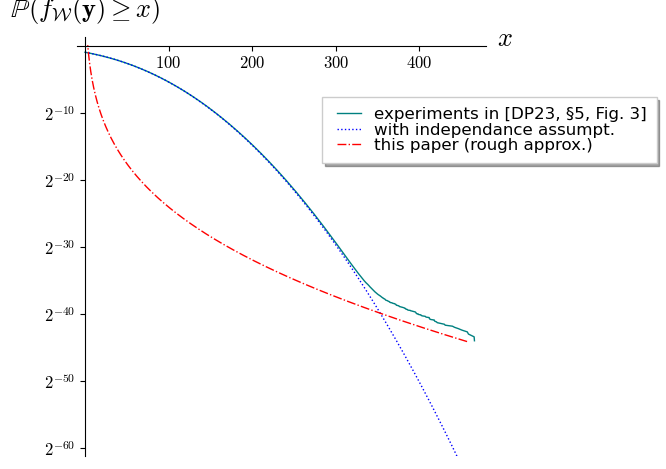

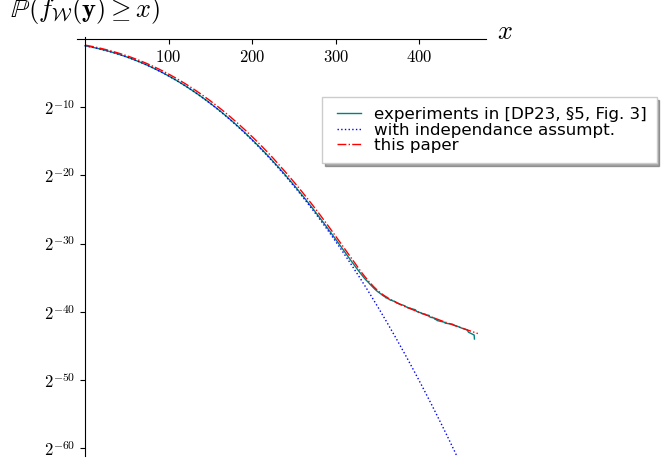

In [5]:
fd = open('out_n60_fft17_enum28.txt', 'r')
lines = fd.readlines()

tag = 0
N,n,q,kfft,enum = 0,0,0,0,0

Bprime_list = []
UinvT_list = []
dual_vectors = []
dual_vectors_rebased = []

for line in lines:
    if line[:3] == "-->":
        if tag == 1:
            line = line[:-1].replace("  ", " ")
            while "  " in line:
                line = line.replace("  ", " ")
            splitted_line = line.split(" ")
            n = int(splitted_line[3][2:])
            N = int(splitted_line[4][2:])
            q = int(splitted_line[5][2:])
            kfft = int(splitted_line[6][4:])
            enum = int(splitted_line[7][5:])

            print("q =",q)
            print("n =",n)
            print("N =",N)
            print("kfft =",kfft)
            print("enum =",enum)
        tag += 1
    elif(tag == 1):
        splitted_line = line[1:-2].split(", ")
        v = [float(x) for x in splitted_line]
        Bprime_list.append(v)
    elif(tag == 2):
        splitted_line = line[1:-2].split(", ")
        v = [float(x) for x in splitted_line]
        dual_vectors.append(v)

Bprime = matrix(Bprime_list)
Bprime_inv = Bprime.inverse()

vol_primal = abs(Bprime.determinant())
vol_dual = abs(Bprime_inv.determinant())
dgv = float(GH(n)*(vol_primal^(1/n)))


lengths_dual_vectors = [sqrt(sum([x*x for x in vector(v)*Bprime_inv.transpose()])) for v in dual_vectors]
w = float(sum(lengths_dual_vectors)/len(lengths_dual_vectors))

def Nj_f(x):
    card_Lambda = q^(n/2) * 2^(kfft)
    return float((1/card_Lambda) * (x/GH(n))^n)

#plot(Nj_f, 0, dgv).show()

L = []
L_pt = []

j = dgv - 55
while Nj_f(j) < 1.0 :
    j += 0.1
    bessel = bessel_J(n/2 - 1, 2*pi*w*j)
    L_pt.append([j, bessel])
    cst = float(N*sqrt(pi * n)/e)
    Nj = Nj_f(j)
    T = float((n/(2*pi*e*w*j))^(n/2 - 1))
    x = float(cst*T*bessel)
    y = float(log(Nj, 2))
    L.append([x,y])
    #print([x,y])

#(plot(lambda x: bessel_J(n/2 - 1, 2*pi*w*x), 0, dgv, color='green') + list_plot(L_pt, color='red')).show()

# Survival function of Xfall in the waterfall zone (survival function with the independance assumption)
def sf_Xfall(x):
    return float(log(0.5*erfc(x/sqrt(N)), 2))

plt_rough = plt_DP23_n60 + plot(sf_Xfall, 0, 470, ymin=-60, linestyle=':', color='blue', legend_label='with independance assumpt.')
plt_rough += list_plot(L, plotjoined=True,  linestyle='-.', color='red', axes_labels=['$x$', '$\\mathbb{P}\\left(f_{\\mathcal{W}}(\\mathbf{y}) \\geq x \\right)$'], legend_label='this paper (rough approx.)', ticks=[[100,200,300,400], [-10,-20,-30,-40,-50,-60]], tick_formatter=[["$100$","$200$","$300$","$400$"], ["$2^{-10}$","$2^{-20}$","$2^{-30}$","$2^{-40}$","$2^{-50}$","$2^{-60}$"]], fontsize=12)

plt_rough.set_legend_options(handlelength=2, loc=(0.6,0.7), font_size=12)
plt_rough.save("figures/dual_attack_n60_rough_"+tex_format+".pdf")
plt_rough.show()


# A more precise prediction
RR = RealField(512)

# The evaluation function
def f_W(j):
    return float( N * (sqrt(n*pi)/e) * (n/(2*pi*e*w*j))^(n/2-1) * bessel_J(n/2 - 1, 2*pi*w*j) )

# Cumulative distribution function of j_1
def cdf_len_shortest(j):
    vol_B1 = pi^(n/2) / gamma(n/2 + 1)
    theta = vol_primal / vol_B1
    return RR(1 - exp(- (j^n)/theta))

# Survival function of Xfloor := f_W(j_1)
sf_Xfloor_sampled = []
j=1
x = f_W(j)
y = cdf_len_shortest(j)
while y < 1 - 10^(-100): 
    sf_Xfloor_sampled = [[x,float(log(y))]] + sf_Xfloor_sampled
    j += 1
    x = f_W(j)
    y = cdf_len_shortest(j)

x_floor_min = sf_Xfloor_sampled[0][0]
x_floor_max = sf_Xfloor_sampled[-1][0]

# interpolate sf_floor_sampled
sf_Xfloor = spline(sf_Xfloor_sampled)
    
    
# Probability density function of Xfall (waterfall zone)
def pdf_Xfall(x):
    return float( -(x^2)/N  - 0.5*log(pi * N) )


# Survival function of X (convolutional product of sf_Xfloor and pdf_Xfall)
def sf_X(x):
    # note that sf_Xfloor(x) = 1 for x < x_floor_min and sf_Xfloor(x) = 0 for x > x_floor_max
    tmp1 = numerical_integral( lambda t : exp(RR(pdf_Xfall(x-t))), -Infinity, x_floor_min)[0]
    tmp2 = numerical_integral( lambda t : exp(RR(sf_Xfloor(t) + pdf_Xfall(x-t))), x_floor_min, x_floor_max)[0]
    return tmp1+tmp2


plt_precise = plt_DP23_n60 + plot(sf_Xfall, 0, 470, ymin=-60, linestyle=':', color='blue', legend_label='with independance assumpt.')
plt_precise += plot(lambda x : log(sf_X(x), 2), 0, 470, linestyle='-.', color='red', axes_labels=['$x$', '$\\mathbb{P}\\left(f_{\\mathcal{W}}(\\mathbf{y}) \\geq x \\right)$'], legend_label='this paper', ticks=[[100,200,300,400], [-10,-20,-30,-40,-50,-60]], tick_formatter=[["$100$","$200$","$300$","$400$"], ["$2^{-10}$","$2^{-20}$","$2^{-30}$","$2^{-40}$","$2^{-50}$","$2^{-60}$"]], fontsize=12)

plt_precise.set_legend_options(handlelength=2, loc=(0.6,0.7), font_size=12)
plt_precise.save("figures/dual_attack_n60_precise_"+tex_format+".pdf")
plt_precise.show()

q = 3329
n = 70
N = 21238
kfft = 18
enum = 27


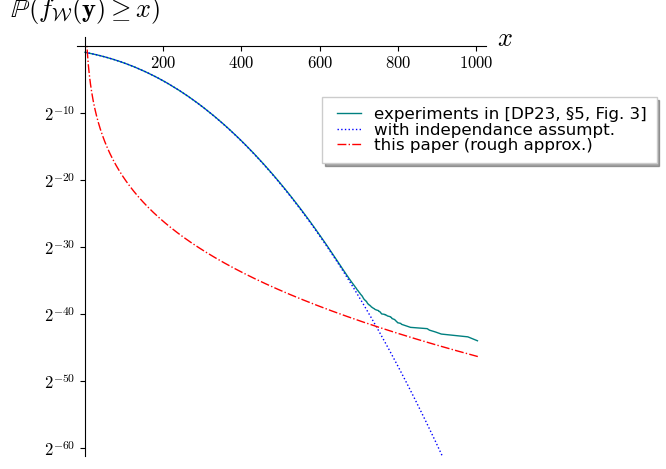

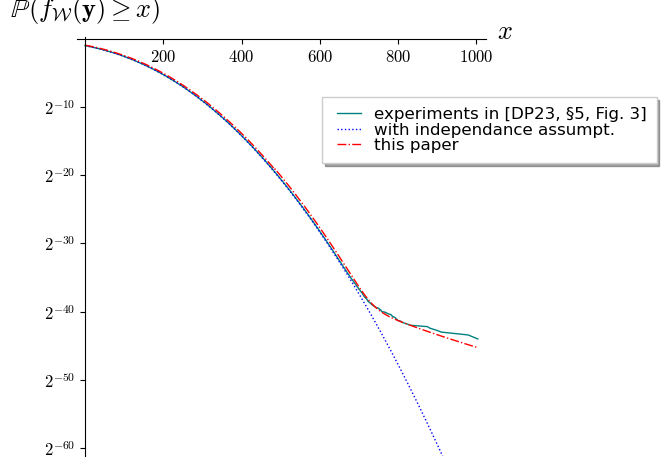

In [6]:
fd = open('out_n70_fft18_enum27.txt', 'r')
lines = fd.readlines()

tag = 0
N,n,q,kfft,enum = 0,0,0,0,0

Bprime_list = []
UinvT_list = []
dual_vectors = []
dual_vectors_rebased = []

for line in lines:
    if line[:3] == "-->":
        if tag == 1:
            line = line[:-1].replace("  ", " ")
            while "  " in line:
                line = line.replace("  ", " ")
            splitted_line = line.split(" ")
            n = int(splitted_line[3][2:])
            N = int(splitted_line[4][2:])
            q = int(splitted_line[5][2:])
            kfft = int(splitted_line[6][4:])
            enum = int(splitted_line[7][5:])

            print("q =",q)
            print("n =",n)
            print("N =",N)
            print("kfft =",kfft)
            print("enum =",enum)
        tag += 1
    elif(tag == 1):
        splitted_line = line[1:-2].split(", ")
        v = [float(x) for x in splitted_line]
        Bprime_list.append(v)
    elif(tag == 2):
        splitted_line = line[1:-2].split(", ")
        v = [float(x) for x in splitted_line]
        dual_vectors.append(v)

Bprime = matrix(Bprime_list)
Bprime_inv = Bprime.inverse()

vol_primal = abs(Bprime.determinant())
vol_dual = abs(Bprime_inv.determinant())
dgv = float(GH(n)*(vol_primal^(1/n)))


lengths_dual_vectors = [sqrt(sum([x*x for x in vector(v)*Bprime_inv.transpose()])) for v in dual_vectors]
w = float(sum(lengths_dual_vectors)/len(lengths_dual_vectors))


def Nj_f(x):
    card_Lambda = q^(n/2) * 2^(kfft)
    return float((1/card_Lambda) * (x/GH(n))^n)

#plot(Nj_f, 0, dgv).show()

L = []
L_pt = []

j = dgv - 53.5
while Nj_f(j) < 1.0 :
    j += 0.1
    bessel = bessel_J(n/2 - 1, 2*pi*w*j)
    L_pt.append([j, bessel])
    cst = float(N*sqrt(pi * n)/e)
    Nj = Nj_f(j)
    T = float((n/(2*pi*e*w*j))^(n/2 - 1))
    x = float(cst*T*bessel)
    y = float(log(Nj, 2))
    L.append([x,y])
    #print([x,y])

#(plot(lambda x: bessel_J(n/2 - 1, 2*pi*w*x), 0, dgv, color='green') + list_plot(L_pt, color='red')).show()

# Survival function of Xfall in the waterfall zone (survival function with the independance assumption)
def sf_Xfall(x):
    return float(log(0.5*erfc(x/sqrt(N)), 2))

plt_rough = plt_DP23_n70 + plot(sf_Xfall, 0, 1000, ymin=-60, linestyle=':', color='blue', legend_label='with independance assumpt.')
plt_rough += list_plot(L, plotjoined=True,  linestyle='-.', color='red', axes_labels=['$x$', '$\\mathbb{P}\\left(f_{\\mathcal{W}}(\\mathbf{y}) \\geq x \\right)$'], legend_label='this paper (rough approx.)', ticks=[[200,400,600,800,1000], [-10,-20,-30,-40,-50,-60]], tick_formatter=[["$200$","$400$","$600$","$800$","$1000$"], ["$2^{-10}$","$2^{-20}$","$2^{-30}$","$2^{-40}$","$2^{-50}$","$2^{-60}$"]], fontsize=12)

plt_rough.set_legend_options(handlelength=2, loc=(0.6,0.7), font_size=12)
plt_rough.save("figures/dual_attack_n70_rough_"+tex_format+".pdf")
plt_rough.show()


# A more precise prediction
RR = RealField(512)

# The evaluation function
def f_W(j):
    return float( N * (sqrt(n*pi)/e) * (n/(2*pi*e*w*j))^(n/2-1) * bessel_J(n/2 - 1, 2*pi*w*j) )

# Cumulative distribution function of j_1
def cdf_len_shortest(j):
    vol_B1 = pi^(n/2) / gamma(n/2 + 1)
    theta = vol_primal / vol_B1
    return RR(1 - exp(- (j^n)/theta))

# Survival function of Xfloor := f_W(j_1)
sf_Xfloor_sampled = []
j=1
x = f_W(j)
y = cdf_len_shortest(j)
while y < 1 - 10^(-100): 
    sf_Xfloor_sampled = [[x,float(log(y))]] + sf_Xfloor_sampled
    j += 1
    x = f_W(j)
    y = cdf_len_shortest(j)

x_floor_min = sf_Xfloor_sampled[0][0]
x_floor_max = sf_Xfloor_sampled[-1][0]

# interpolate sf_floor_sampled
sf_Xfloor = spline(sf_Xfloor_sampled)
    
    
# Probability density function of Xfall (waterfall zone)
def pdf_Xfall(x):
    return float( -(x^2)/N  - 0.5*log(pi * N) )


# Survival function of X (convolutional product of sf_Xfloor and pdf_Xfall)
def sf_X(x):
    # note that sf_Xfloor(x) = 1 for x < x_floor_min and sf_Xfloor(x) = 0 for x > x_floor_max
    tmp1 = numerical_integral( lambda t : exp(RR(pdf_Xfall(x-t))), -Infinity, x_floor_min)[0]
    tmp2 = numerical_integral( lambda t : exp(RR(sf_Xfloor(t) + pdf_Xfall(x-t))), x_floor_min, x_floor_max)[0]
    return tmp1+tmp2


plt_precise = plt_DP23_n70 + plot(sf_Xfall, 0, 1000, ymin=-60, linestyle=':', color='blue', legend_label='with independance assumpt.')
plt_precise += plot(lambda x : log(sf_X(x), 2), 0, 1000, linestyle='-.', color='red', axes_labels=['$x$', '$\\mathbb{P}\\left(f_{\\mathcal{W}}(\\mathbf{y}) \\geq x \\right)$'], legend_label='this paper', ticks=[[200,400,600,800,1000], [-10,-20,-30,-40,-50,-60]], tick_formatter=[["$200$","$400$","$600$","$800$","$1000$"], ["$2^{-10}$","$2^{-20}$","$2^{-30}$","$2^{-40}$","$2^{-50}$","$2^{-60}$"]], fontsize=12)

plt_precise.set_legend_options(handlelength=2, loc=(0.6,0.7), font_size=12)
plt_precise.save("figures/dual_attack_n70_precise_"+tex_format+".pdf")
plt_precise.show()


q = 3329
n = 80
N = 89494
kfft = 20
enum = 27


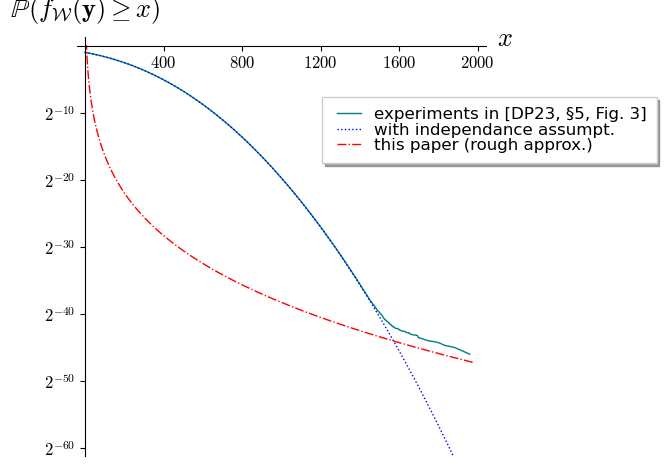

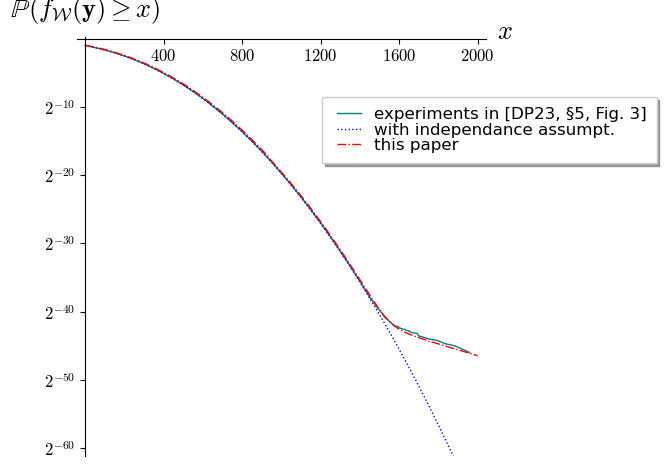

In [7]:
fd = open('out_n80_fft20_enum27.txt', 'r')
lines = fd.readlines()

tag = 0
N,n,q,kfft,enum = 0,0,0,0,0

Bprime_list = []
UinvT_list = []
dual_vectors = []
dual_vectors_rebased = []

for line in lines:
    if line[:3] == "-->":
        if tag == 1:
            line = line[:-1].replace("  ", " ")
            while "  " in line:
                line = line.replace("  ", " ")
            splitted_line = line.split(" ")
            n = int(splitted_line[3][2:])
            N = int(splitted_line[4][2:])
            q = int(splitted_line[5][2:])
            kfft = int(splitted_line[6][4:])
            enum = int(splitted_line[7][5:])

            print("q =",q)
            print("n =",n)
            print("N =",N)
            print("kfft =",kfft)
            print("enum =",enum)
        tag += 1
    elif(tag == 1):
        splitted_line = line[1:-2].split(", ")
        v = [float(x) for x in splitted_line]
        Bprime_list.append(v)
    elif(tag == 2):
        splitted_line = line[1:-2].split(", ")
        v = [float(x) for x in splitted_line]
        dual_vectors.append(v)

Bprime = matrix(Bprime_list)
Bprime_inv = Bprime.inverse()

vol_primal = abs(Bprime.determinant())
vol_dual = abs(Bprime_inv.determinant())
dgv = float(GH(n)*(vol_primal^(1/n)))


lengths_dual_vectors = [sqrt(sum([x*x for x in vector(v)*Bprime_inv.transpose()])) for v in dual_vectors]
w = float(sum(lengths_dual_vectors)/len(lengths_dual_vectors))


def Nj_f(x):
    card_Lambda = q^(n/2) * 2^(kfft)
    return float((1/card_Lambda) * (x/GH(n))^n)

#plot(Nj_f, 0, dgv).show()

L = []
L_pt = []

j = dgv - 51.7
while Nj_f(j) < 1.0 :
    j += 0.1
    bessel = bessel_J(n/2 - 1, 2*pi*w*j)
    L_pt.append([j, bessel])
    cst = float(N*sqrt(pi * n)/e)
    Nj = Nj_f(j)
    T = float((n/(2*pi*e*w*j))^(n/2 - 1))
    x = float(cst*T*bessel)
    y = float(log(Nj, 2))
    L.append([x,y])
    #print([x,y])

#(plot(lambda x: bessel_J(n/2 - 1, 2*pi*w*x), 0, dgv, color='green') + list_plot(L_pt, color='red')).show()

# Survival function of Xfall in the waterfall zone (survival function with the independance assumption)
def sf_Xfall(x):
    return float(log(0.5*erfc(x/sqrt(N)), 2))

plt_rough = plt_DP23_n80 + plot(sf_Xfall, 0, 2000, ymin=-60, linestyle=':', color='blue', legend_label='with independance assumpt.')
plt_rough += list_plot(L, plotjoined=True,  linestyle='-.', color='red', axes_labels=['$x$', '$\\mathbb{P}\\left(f_{\\mathcal{W}}(\\mathbf{y}) \\geq x \\right)$'], legend_label='this paper (rough approx.)', ticks=[[400,800,1200,1600,2000], [-10,-20,-30,-40,-50,-60]], tick_formatter=[["$400$","$800$","$1200$","$1600$","$2000$"], ["$2^{-10}$","$2^{-20}$","$2^{-30}$","$2^{-40}$","$2^{-50}$","$2^{-60}$"]], fontsize=12)

plt_rough.set_legend_options(handlelength=2, loc=(0.6,0.7), font_size=12)
plt_rough.save("figures/dual_attack_n80_rough_"+tex_format+".pdf")
plt_rough.show()


# A more precise prediction
RR = RealField(1024)

# The evaluation function
def f_W(j):
    return float( N * (sqrt(n*pi)/e) * (n/(2*pi*e*w*j))^(n/2-1) * bessel_J(n/2 - 1, 2*pi*w*j) )

# Cumulative distribution function of j_1
def cdf_len_shortest(j):
    vol_B1 = pi^(n/2) / gamma(n/2 + 1)
    theta = vol_primal / vol_B1
    return RR(1 - exp(- (j^n)/theta))

# Survival function of Xfloor := f_W(j_1)
sf_Xfloor_sampled = []
j=1
x = f_W(j)
y = cdf_len_shortest(j)
while y < 1 - 10^(-100): 
    sf_Xfloor_sampled = [[x,float(log(y))]] + sf_Xfloor_sampled
    j += 1
    x = f_W(j)
    y = cdf_len_shortest(j)

x_floor_min = sf_Xfloor_sampled[0][0]
x_floor_max = sf_Xfloor_sampled[-1][0]

# interpolate sf_floor_sampled
sf_Xfloor = spline(sf_Xfloor_sampled)
    
    
# Probability density function of Xfall (waterfall zone)
def pdf_Xfall(x):
    return float( -(x^2)/N  - 0.5*log(pi * N) )


# Survival function of X (convolutional product of sf_Xfloor and pdf_Xfall)
def sf_X(x):
    # note that sf_Xfloor(x) = 1 for x < x_floor_min and sf_Xfloor(x) = 0 for x > x_floor_max
    tmp1 = numerical_integral( lambda t : exp(RR(pdf_Xfall(x-t))), -Infinity, x_floor_min)[0]
    tmp2 = numerical_integral( lambda t : exp(RR(sf_Xfloor(t) + pdf_Xfall(x-t))), x_floor_min, x_floor_max)[0]
    return tmp1+tmp2


plt_precise = plt_DP23_n80 + plot(sf_Xfall, 0, 2000, ymin=-60, linestyle=':', color='blue', legend_label='with independance assumpt.')
plt_precise += plot(lambda x : log(sf_X(x), 2), 0, 2000, linestyle='-.', color='red', axes_labels=['$x$', '$\\mathbb{P}\\left(f_{\\mathcal{W}}(\\mathbf{y}) \\geq x \\right)$'], legend_label='this paper', ticks=[[400,800,1200,1600,2000], [-10,-20,-30,-40,-50,-60]], tick_formatter=[["$400$","$800$","$1200$","$1600$","$2000$"], ["$2^{-10}$","$2^{-20}$","$2^{-30}$","$2^{-40}$","$2^{-50}$","$2^{-60}$"]], fontsize=12)

plt_precise.set_legend_options(handlelength=2, loc=(0.6,0.7), font_size=12)
plt_precise.save("figures/dual_attack_n80_precise_"+tex_format+".pdf")
plt_precise.show()


q = 3329
n = 90
N = 377126
kfft = 22
enum = 26


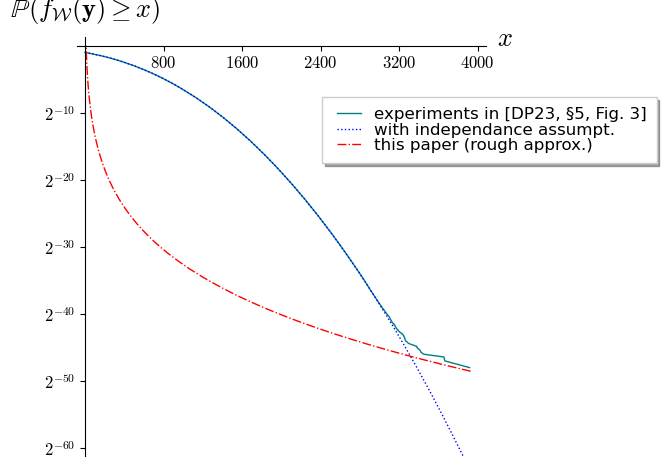

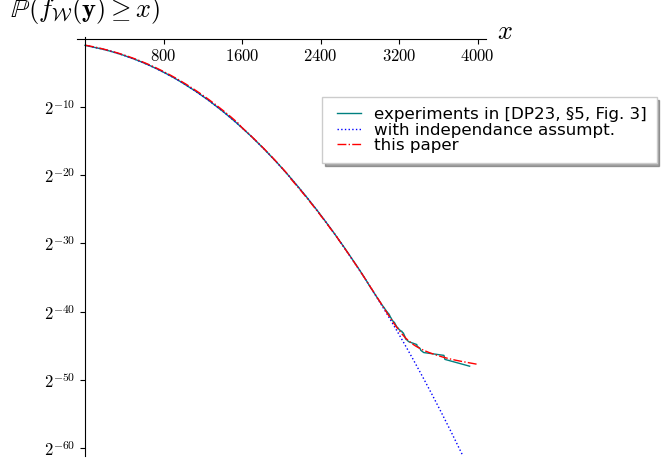

In [8]:
fd = open('out_n90_fft22_enum26.txt', 'r')
lines = fd.readlines()

tag = 0
N,n,q,kfft,enum = 0,0,0,0,0

Bprime_list = []
UinvT_list = []
dual_vectors = []
dual_vectors_rebased = []

for line in lines:
    if line[:3] == "-->":
        if tag == 1:
            line = line[:-1].replace("  ", " ")
            while "  " in line:
                line = line.replace("  ", " ")
            splitted_line = line.split(" ")
            n = int(splitted_line[3][2:])
            N = int(splitted_line[4][2:])
            q = int(splitted_line[5][2:])
            kfft = int(splitted_line[6][4:])
            enum = int(splitted_line[7][5:])

            print("q =",q)
            print("n =",n)
            print("N =",N)
            print("kfft =",kfft)
            print("enum =",enum)
        tag += 1
    elif(tag == 1):
        splitted_line = line[1:-2].split(", ")
        v = [float(x) for x in splitted_line]
        Bprime_list.append(v)
    elif(tag == 2):
        splitted_line = line[1:-2].split(", ")
        v = [float(x) for x in splitted_line]
        dual_vectors.append(v)

Bprime = matrix(Bprime_list)
Bprime_inv = Bprime.inverse()

vol_primal = abs(Bprime.determinant())
vol_dual = abs(Bprime_inv.determinant())
dgv = float(GH(n)*(vol_primal^(1/n)))


lengths_dual_vectors = [sqrt(sum([x*x for x in vector(v)*Bprime_inv.transpose()])) for v in dual_vectors]
w = float(sum(lengths_dual_vectors)/len(lengths_dual_vectors))


def Nj_f(x):
    card_Lambda = q^(n/2) * 2^(kfft)
    return float((1/card_Lambda) * (x/GH(n))^n)

#plot(Nj_f, 0, dgv).show()

L = []
L_pt = []

j = dgv - 50.6
while Nj_f(j) < 1.0 :
    j += 0.1
    bessel = bessel_J(n/2 - 1, 2*pi*w*j)
    L_pt.append([j, bessel])
    cst = float(N*sqrt(pi * n)/e)
    Nj = Nj_f(j)
    T = float((n/(2*pi*e*w*j))^(n/2 - 1))
    x = float(cst*T*bessel)
    y = float(log(Nj, 2))
    L.append([x,y])
    #print([x,y])

#(plot(lambda x: bessel_J(n/2 - 1, 2*pi*w*x), 0, dgv, color='green') + list_plot(L_pt, color='red')).show()

# Survival function of Xfall in the waterfall zone (survival function with the independance assumption)
def sf_Xfall(x):
    return float(log(0.5*erfc(x/sqrt(N)), 2))

plt_rough = plt_DP23_n90 + plot(sf_Xfall, 0, 4000, ymin=-60, linestyle=':', color='blue', legend_label='with independance assumpt.')
plt_rough += list_plot(L, plotjoined=True,  linestyle='-.', color='red', axes_labels=['$x$', '$\\mathbb{P}\\left(f_{\\mathcal{W}}(\\mathbf{y}) \\geq x \\right)$'], legend_label='this paper (rough approx.)', ticks=[[800,1600,2400,3200,4000], [-10,-20,-30,-40,-50,-60]], tick_formatter=[["$800$","$1600$","$2400$","$3200$","$4000$"], ["$2^{-10}$","$2^{-20}$","$2^{-30}$","$2^{-40}$","$2^{-50}$","$2^{-60}$"]], fontsize=12)

plt_rough.set_legend_options(handlelength=2, loc=(0.6,0.7), font_size=12)
plt_rough.save("figures/dual_attack_n90_rough_"+tex_format+".pdf")
plt_rough.show()


# A more precise prediction
RR = RealField(1024)

# The evaluation function
def f_W(j):
    return float( N * (sqrt(n*pi)/e) * (n/(2*pi*e*w*j))^(n/2-1) * bessel_J(n/2 - 1, 2*pi*w*j) )

# Cumulative distribution function of j_1
def cdf_len_shortest(j):
    vol_B1 = pi^(n/2) / gamma(n/2 + 1)
    theta = vol_primal / vol_B1
    return RR(1 - exp(- (j^n)/theta))

# Survival function of Xfloor := f_W(j_1)
sf_Xfloor_sampled = []
j=1
x = f_W(j)
y = cdf_len_shortest(j)
while y < 1 - 10^(-100): 
    sf_Xfloor_sampled = [[x,float(log(y))]] + sf_Xfloor_sampled
    j += 1
    x = f_W(j)
    y = cdf_len_shortest(j)

x_floor_min = sf_Xfloor_sampled[0][0]
x_floor_max = sf_Xfloor_sampled[-1][0]

# interpolate sf_floor_sampled
sf_Xfloor = spline(sf_Xfloor_sampled)
    
    
# Probability density function of Xfall (waterfall zone)
def pdf_Xfall(x):
    return float( -(x^2)/N  - 0.5*log(pi * N) )


# Survival function of X (convolutional product of sf_Xfloor and pdf_Xfall)
def sf_X(x):
    # note that sf_Xfloor(x) = 1 for x < x_floor_min and sf_Xfloor(x) = 0 for x > x_floor_max
    tmp1 = numerical_integral( lambda t : exp(RR(pdf_Xfall(x-t))), -Infinity, x_floor_min)[0]
    tmp2 = numerical_integral( lambda t : exp(RR(sf_Xfloor(t) + pdf_Xfall(x-t))), x_floor_min, x_floor_max)[0]
    return tmp1+tmp2


plt_precise = plt_DP23_n90 + plot(sf_Xfall, 0, 4000, ymin=-60, linestyle=':', color='blue', legend_label='with independance assumpt.')
plt_precise += plot(lambda x : log(sf_X(x), 2), 0, 4000, linestyle='-.', color='red', axes_labels=['$x$', '$\\mathbb{P}\\left(f_{\\mathcal{W}}(\\mathbf{y}) \\geq x \\right)$'], legend_label='this paper', ticks=[[800,1600,2400,3200,4000], [-10,-20,-30,-40,-50,-60]], tick_formatter=[["$800$","$1600$","$2400$","$3200$","$4000$"], ["$2^{-10}$","$2^{-20}$","$2^{-30}$","$2^{-40}$","$2^{-50}$","$2^{-60}$"]], fontsize=12)

plt_precise.set_legend_options(handlelength=2, loc=(0.6,0.7), font_size=12)
plt_precise.save("figures/dual_attack_n90_precise_"+tex_format+".pdf")
plt_precise.show()
